<a href="https://colab.research.google.com/github/Urvi-M/BE559/blob/main/Homework1_part1_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 1.1 (24 points)

**Learning objectives:**

In this assignment, we will get started using Python in a Google Colab notebook.  We will explore how to:

*   load data
*   manipulate arrays
*   visualize probability density functions (PDFs) and cumulative distribution functions (CDFs)
*   z-score data

---
## Part 1 (2 points)
*   First, load the package 'numpy'.  

Numpy is a widely used python package that contains a large number of mathematical functions that we will use for various analyses throughout the course.  It also adds support for multidimensional arrays that we will store data in.  Give numpy the alias 'np' for brevity.  To do this, type:

`import numpy as np`

For those who are familiar with Matlab but just getting started with Python, here is a useful cheat sheet:

https://numpy.org/doc/stable/user/numpy-for-matlab-users.html

In [1]:
import numpy as np

---
## Part 2 (2 points)
*   Next, load `matplotlib.pyplot` and call it `plt` for brevity.  

`pyplot` is a part of the larger `matplotlib` package, which contains powerful functionality for plotting data using similar syntax to Matlab.  Thus, `pyplot` is a subpackage of` matplotlib`.

*   Similarly, load in `scipy.stats` and call it `stats`.

In [2]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

---
## Part 3 (2 points)
*   Load a dataset that includes height and weight data from 25,000 18-year-olds.  These data are stored in a .csv (comma separated values) file at the following URL:

https://raw.githubusercontent.com/BU-BME-DataSci-ML/Spring-2023/main/Homework1/SOCR-HeightWeight.csv

To do this, use the `genfromtxt` function in numpy (i.e. `np.genfromtxt`) to load the data directly from this URL into a variable called `HeightsAndWeights`.  Since this is a .csv file, you will need to set the delimeter to ',' (a comma in single quotes).  The first row in the file contains column labels.  You can use the option `skip_header=1` to skip the first line and only read the numerical data.  

You should be able to mouse over the function name in your code to see more information about it.  Select 'open in tab' to see more information about `genfromtxt` or view the help page online https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html

You can get additional information about other fuctions in a similar manner.

In [3]:
HeightsAndWeights = np.genfromtxt('https://raw.githubusercontent.com/BU-BME-DataSci-ML/Spring-2023/main/Homework1/SOCR-HeightWeight.csv',delimiter=',',skip_header=1)

---
## Part 4 (2 points)
Make some easy-to-use variables.  

*   Assign the height data (in the second column of HeightsAndWeights) to a variable called `heights`.  Similarly, assign the weight data (the third column) to a variable called `weights`.

*   Calculate the mean and standard deviation of the heights data and assign these values variables called `meanHeight` and `stdHeight` using the numpy functions `mean` and `std`.

In [4]:
#HeightsAndWeights
heights = HeightsAndWeights[:,1]
weights = HeightsAndWeights[:,2]
meanHeight = np.mean(heights)
stdHeight = np.std(heights)

---
## Part 5 (2 points)
Next, lets plot some things that allow us to get a sense of our data.  


*   Use the `subplots` function in `matplotlib` to create a 1x3 row of three axes like this:

`fig, axs = plt.subplots(1, 3)`

Here, `axs` is a vector of axes handles.  A handle is an identifier for a graphics object that can be used to refer to and modify that object. If you click the `{x} `icon on the left hand side of your notebook, you will see all of the variables in your workspace.  You should see, for example that this command created an n-dimensional array (ndarray)  called `axs` with three elements.

*   Plot a histogram of the height data in the first subplot.  Make a histogram with 50 bins.

`axs[0].hist(heights, bins = 50)`

*   Plot a histgram of the weight data in the second subplot.  Again, use 50 bins.

*   Make a scatter plot (using `axs[].plot` instead of `axs[].hist`) with the height data on the x-axis and the weight data on the y-axis in the third subplot.  Show each data point as a black dot and set the alpha (transparency) of the points to 0.1.

---

In all cases, label your axes appropriately.  You can use the following commands to size your plots nicely:

```
fig.set_size_inches(16, 4)
plt.tight_layout()
```

You can also use this command to change the fontsize associated with axes you create (must be run before you call plot commands).

`plt.rcParams.update({'font.size': 16})`

Your plots should look like the ones below:

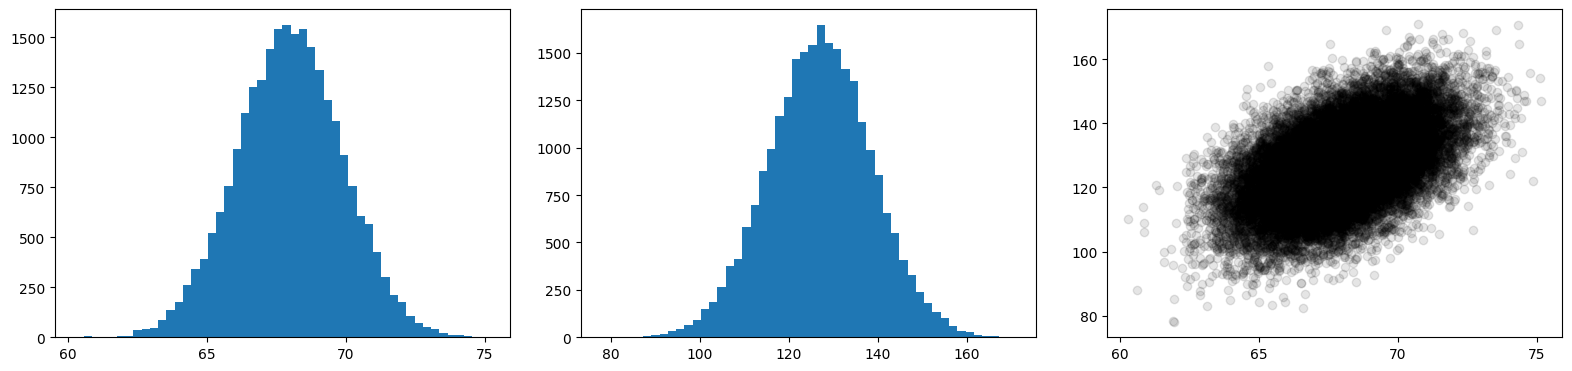

In [5]:
fig, axs = plt.subplots(1, 3)
fig.set_size_inches(16, 4)
plt.rcParams.update({'font.size': 16})
axs[0].hist(heights, bins = 50)
axs[1].hist(weights, bins = 50)
axs[2].scatter(heights,weights, color = 'black', alpha = 0.1)
plt.tight_layout()

---
## Part 6 (2 points)
Are heights normally distributed?  No need for statistical tests yet, lets just take a look by eye.

*   Use `plt.hist` to make a histogram of the height data just as you did above.  This time, apply the option `density=true`, which normalizes bin counts so that the sum of all bins equals 1.

*   On the same plot, display the probability density function (PDF) of a normal distribution that has the same mean and standard deviation as your data. We'll do it two ways.

**Method 1:** First, we will calculate the PDF based on the familiar equation for a normal distribution.

$ P(x,\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}} e^{(-\frac{{(x - \mu)}^{2}}{2\sigma^{2}})}$

> **Step 1:** Create a vector of heights at which we will calculate probabilities.  Use the numpy function `arange` to create a vector called `xdata` with a minimum value of `meanHeight`-5, a maximum value of `meanHeight`+5, and increments of 0.1.

> **Step 2:** Find the probability density at each point using the equation above.  You may need to use numpy functions such as `np.sqrt`, `np.pi`, and `np.exp`.

> **Step 3:** Plot the normal pdf as a black line with a width of 2.

**Method 2:** Second, we will find the probability density function using built in functionality of `scipy.stats`.  

> **Step 1:** Create a normal random variable called `heightDist` with the same mean and standard deviation as your data using `stats.norm`.

> **Step 2:** Create a variable that contains the probability densities at each point in `xdata` by calling `heightDist.pdf` with `xdata` as the argument.

> **Step 3:** Plot the normal pdf determined using the stats package as a red dotted line with width 3.

*    Add a legend to this plot that labels the curves determined using **Method 1** and **Method 2**.


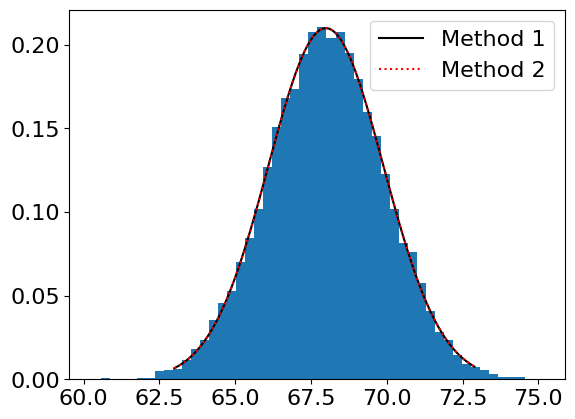

In [6]:
plt.hist(heights,bins =50,density = True)
xdata =np.arange(meanHeight-5,meanHeight+5,0.1)
Method_1 = (1/(np.sqrt(2*np.pi)*stdHeight))*np.exp(- ((xdata-meanHeight)**2)/(2*stdHeight**2))

heightDist = stats.norm(loc = meanHeight,scale = stdHeight)
Method_2= heightDist.pdf(xdata)
#print(Method_2)
plt.plot(xdata,Method_1,color= 'k')
plt.plot(xdata,Method_2,color= 'r', linestyle='dotted')
plt.legend(["Method 1","Method 2"])
plt.show()

It seems these data are normally distributed!

---
## Part 7 (2 points)
Now, suppose you meet someone named Bob. Bob is 5'4".  What is the chance that Bob is 18 years old (i.e. that this value was drawn from the same distribution) based solely on their height?

First, lets see where Bob falls in the normal distribution.

*   Use either method above to plot the pdf of the normal distribution, just as you did above.

*   Calculate the probability density at 5'4" (64 inches) using the normal equation or `scipy.stats`.

*   Plot the probability density at 64 inches on the same axes as a blue dot with `markersize` set to 20.

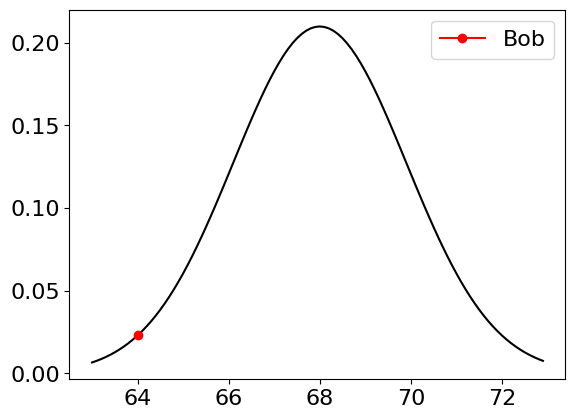

In [7]:
Bob = 64
plt.plot(xdata,Method_1,color= 'k')
pdf = heightDist.pdf(Bob)
plt.plot(Bob,pdf,marker="o",color= 'r', label='Bob')
plt.legend()

---
## Part 8 (2 points)
Lets calculate how far Bob's height is from the mean height in our dataset

*   Calculate the difference between Bob's height and `meanHeight` and assign this value to a variable called `deltaHeight`.

*   Display the answer in plain text using a strategy like this:

`print("Individual is " + str(deltaHeight) + " shorter than average")`

or, if you want to format the output better...

`print(f'Individual is {deltaHeight:.2f} inches shorter than average')`

In [65]:
deltaHeight = Bob-meanHeight
print("Individual is " + str(deltaHeight) + " shorter than average")
print(f'Individual is {deltaHeight:.2f} inches shorter than average')

Individual is -3.9931135967999865 shorter than average
Individual is -3.99 inches shorter than average


---
## Part 9 (2 points)
Is this a lot?  It is more informative to think about this in terms of the width of the distribution - the standard deviation.  

How far is Bob's height from the mean of the distribution in terms of standard deviations?

*   Divide `deltaHeight` by the standard deviation of the height measurements, `stdHeight`.

This is the z-score of Bob's height relative to the normal distribution you determined.

$ z = \frac{(x - \mu)}{\sigma} $

*   Report the z-score of Bob's height using a `print` statement and appropriate text.




In [66]:
Zs = deltaHeight/stdHeight
print("Individual is " + str(Zs) + " standard deviations shorter than average")
print(f'Individual is {Zs:.2f} standard deviations shorter than average')

Individual is -2.0998254394648885 standard deviations shorter than average
Individual is -2.10 standard deviations shorter than average


---
## Part 10 (2 points)
If we apply the same math to our original `heights` data, the distribution now looks like a normal distribution with mean 0 and standard deviation 1.  This is the **standard normal distribution**.

*   Plot a histogram of the full z-scored `heights` data.

*   Plot the PDF of the standard normal distribution using **Method 2** from **Part 6** as a black line.  You'll need to create a standard normal random variable object like this:

   `zDist = stats.norm(0, 1)`

   and then find its PDF using code such as this:

   `zPDF = zDist.pdf(x)`

   where x now spans the interval from -4 to 4.


*   Plot the z-scored measurement of Bob's height on the same axis as a red dot of size 20.


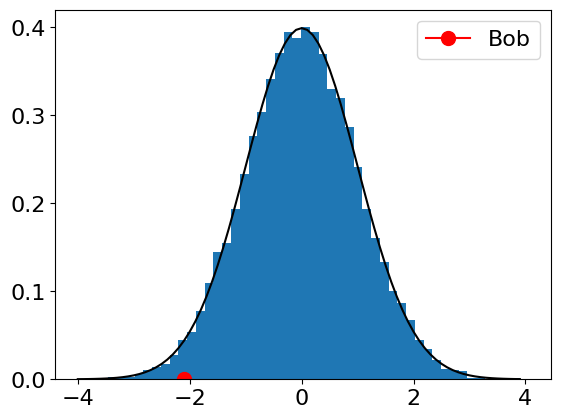

In [75]:
delHeight = (meanHeight-heights)
z= delHeight/stdHeight
x=np.arange(-4,4,0.1)
fig.set_size_inches(16, 4)
plt.hist(z,bins=50,density=True)
zDist = stats.norm(0, 1)
pdf = zDist.pdf(x)
plt.plot(x,pdf,color= 'k')
pdfB = heightDist.pdf(Bob)
plt.plot(Zs,pdfB,marker="o",markersize =10,color= 'r', label='Bob')
# print(pdf)
plt.legend()


---
## Part 11 (2 points)

OK, now we are getting close to an answer!

Next, lets visualize the cumulative distribution function (CDF) of the standard normal.  This is:

$ P(X<x) = {\frac{1}{\sqrt {2\pi}}} \int _{-\infty }^{x}e^{-x^{2}/2} dx $

We'll use `scipy.stats` to calculate this integral for us.

*   You've already created a standard normal random variable, `zDist`, which we'll use.  Find the CDF of the standard normal and plot just as you did for the PDF in **part 10**,  but using `Zdist.cdf` instead of `zDist.pdf`.

*   Plot the PDF on the same axes in blue with `alpha=0.2` for reference

*   On the same axes, plot the cumulative probability at the location of Bob's z-scored height as a red dot.







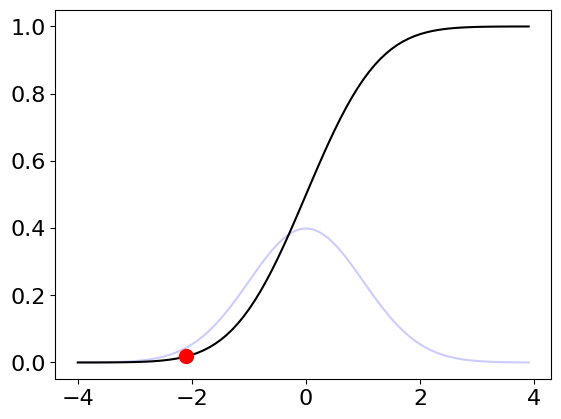

In [76]:
cdf=zDist.cdf(x)
plt.plot(x,pdf,color= 'b',alpha=0.2)
plt.plot(x,cdf,color= 'k')
cdfB = heightDist.cdf(Bob)
plt.plot(Zs,cdfB,marker="o",markersize =10,color= 'r', label='Bob')

---
## Part 12 (2 points)

Now, we will find the likelihood of Bob's height being 64 inches or less under the assumption that Bob's height was drawn randomly from a population of 18 year olds.

We'll do this two ways.

**Method 1:** Find the probability using `scipy.stats`.

*   Calculate the area under the standard normal pdf to the left of our data point (Bob's height, z-scored).  This is the value of the cdf at the same point point.  Use `scipy.stats` to find this value and print it.

**Method 2:** Calculate the proportion of data points in our `heights` dataset that are 64 inches or less.

In [ ]:
method1=scipy.stats()